# Preprocessing 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
climate_data = pd.read_csv('public/data/GlobalLandTemperaturesByCity.csv')
climate_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


We have a lot of nan Values

In [6]:
climate_data.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

non of the dates end with somthing es then 01 so we can only use Year and Month to reduce the size of this column

In [8]:
mask = ~climate_data['dt'].str.endswith('01')

# Filtern des DataFrames basierend auf der Maske
filtered_df = climate_data[mask]

# Ausgabe des gefilterten DataFrames
print(filtered_df)
filtered_df.head()


Empty DataFrame
Columns: [dt, AverageTemperature, AverageTemperatureUncertainty, City, Country, Latitude, Longitude]
Index: []


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


### Dänemark

In [68]:
#filter all values where country is Denmark and city is Århus and save it in new dataframe
climate_data_denmark = climate_data[(climate_data.Country == 'Denmark') & (climate_data.City == 'Århus')]
climate_data_denmark.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [53]:
#count nan values in each column
climate_data_denmark.isnull().sum()

dt                                0
AverageTemperature               73
AverageTemperatureUncertainty    73
City                              0
Country                           0
Latitude                          0
Longitude                         0
dtype: int64

/var/folders/72/cssf9khd09z6smrvmjwffm5r0000gn/T/ipykernel_88577/2152728143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data_denmark['dt'] = pd.to_datetime(climate_data_denmark['dt'])


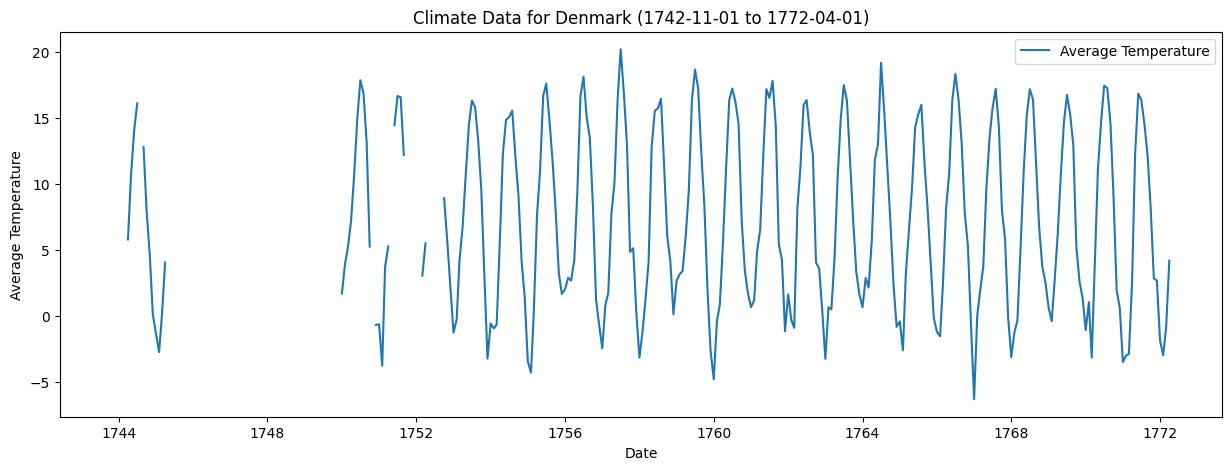

In [69]:
#plot the data from 1743-11-01 to 1772-04-01
climate_data_denmark['dt'] = pd.to_datetime(climate_data_denmark['dt'])

# Filter data within the specified date range
filtered_data = climate_data_denmark[
    (climate_data_denmark['dt'] >= '1743-11-01') & (climate_data_denmark['dt'] <= '1772-04-01')
]

# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(filtered_data['dt'], filtered_data['AverageTemperature'], label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Climate Data for Denmark (1742-11-01 to 1772-04-01)')
plt.legend()
plt.show()



In [43]:
climate_data_denmark.shape
climate_data_denmark.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,AverageTemperatureP
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,6.012
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.956
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.900
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.844


In [55]:
# make copy of AverageTemperature column
# climate_data_denmark['AverageTemperatureSave'] = climate_data_denmark['AverageTemperature']

climate_data_denmark['AverageTemperature'] = climate_data_denmark['AverageTemperatureSave']
#climate_data_denmark['AverageTemperatureP'].interpolate(method='linear', inplace=True)

/var/folders/72/cssf9khd09z6smrvmjwffm5r0000gn/T/ipykernel_88577/1483530794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data_denmark['AverageTemperatureSave'] = climate_data_denmark['AverageTemperature']


In [61]:
climate_data_denmark.set_index('dt', inplace=True)

In [70]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
# First, interpolate to fill missing values temporarily
climate_data_denmark['InterpolatedTemp'] = climate_data_denmark['AverageTemperature'].interpolate(method='linear')

# Perform seasonal decomposition on the interpolated data
decomposition = seasonal_decompose(climate_data_denmark['InterpolatedTemp'], model='additive', period=12)

# Get the seasonal component
seasonal = decomposition.seasonal

# Subtract the seasonal component, interpolate the original missing values, and then add the seasonal component back
climate_data_denmark['FilledTemp'] = climate_data_denmark['AverageTemperature'] - seasonal
climate_data_denmark['FilledTemp'].interpolate(method='linear', inplace=True)
climate_data_denmark['FilledTemp'] += seasonal

# Now replace the originally interpolated values with the seasonally adjusted values
climate_data_denmark['AverageTemperature'].fillna(climate_data_denmark['FilledTemp'], inplace=True)

# Drop the temporary columns
climate_data_denmark.drop(['InterpolatedTemp', 'FilledTemp'], axis=1, inplace=True)


/var/folders/72/cssf9khd09z6smrvmjwffm5r0000gn/T/ipykernel_88577/3271775885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data_denmark['InterpolatedTemp'] = climate_data_denmark['AverageTemperature'].interpolate(method='linear')
/var/folders/72/cssf9khd09z6smrvmjwffm5r0000gn/T/ipykernel_88577/3271775885.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_data_denmark['FilledTemp'] = climate_data_denmark['AverageTemperature'] - seasonal
/var/folders/72/cssf9khd09z6smrvmjwffm5r0000gn/T/

In [41]:
climate_data_denmark.isnull().sum()

dt                                0
AverageTemperature               73
AverageTemperatureUncertainty    73
City                              0
Country                           0
Latitude                          0
Longitude                         0
AverageTemperatureP               0
dtype: int64

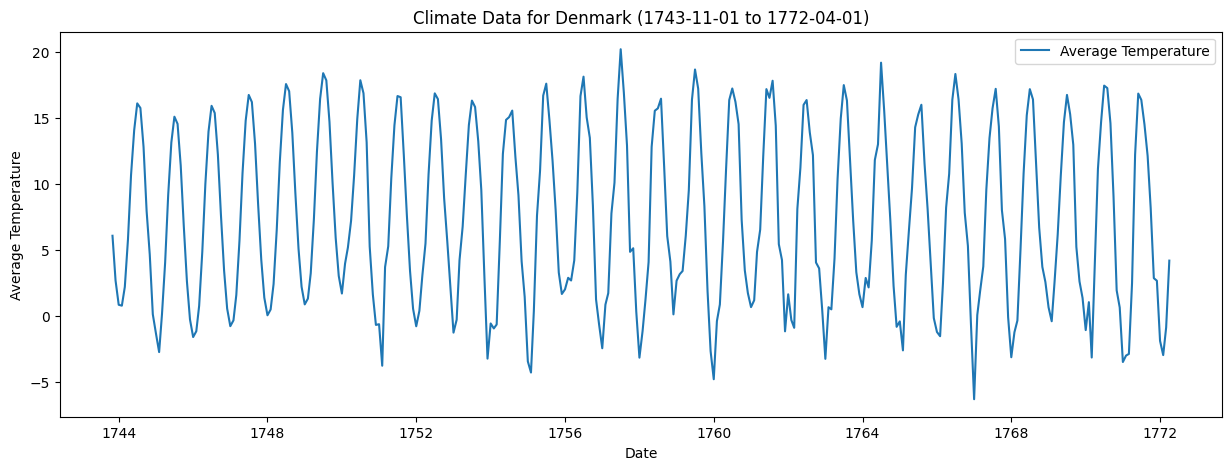

In [71]:
#plot the data from 1743-11-01 to 1772-04-01
# climate_data_denmark['dt'] = pd.to_datetime(climate_data_denmark['dt'])

# # Filter data within the specified date range
# filtered_data = climate_data_denmark[
#     (climate_data_denmark['dt'] >= '1743-11-01') & (climate_data_denmark['dt'] <= '1772-04-01')
# ]

climate_data_denmark_reset = climate_data_denmark.reset_index()

# Now you can access 'dt' as a regular column
# Plot the data from 1743-11-01 to 1772-04-01
start_date = '1743-11-01'
end_date = '1772-04-01'

# Filter data within the specified date range
filtered_data = climate_data_denmark_reset[(climate_data_denmark_reset['dt'] >= start_date) & (climate_data_denmark_reset['dt'] <= end_date)]


# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(filtered_data['dt'], filtered_data['AverageTemperature'], label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Climate Data for Denmark (1743-11-01 to 1772-04-01)')
plt.legend()
plt.show()

### Impute data

In [16]:
climate_data['AverageTemperature'].interpolate(method='linear', inplace=True)

In [17]:
climate_data.isnull().sum()

dt                                    0
AverageTemperature                    0
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [18]:
grouped_df = climate_data.groupby(['Country', 'City'])['AverageTemperature'].apply(list).reset_index(name='AverageTemperatures')

In [19]:
grouped_df.head()

,Country,City,AverageTemperatures
0,Afghanistan,Baglan,"[-2.204, -1.171, 3.4590000000000005, 9.9170000..."
1,Afghanistan,Gardez,"[5.553, 6.546, 10.775, 17.175, 22.778, 26.83, ..."
2,Afghanistan,Gazni,"[8.807, 3.343, -0.988, 1.6145, 4.2170000000000..."
3,Afghanistan,Herat,"[26.466, 24.34, 19.423, 11.376, 6.297999999999..."
4,Afghanistan,Jalalabad,"[2.29, 3.319, 7.443999999999999, 13.576, 19.32..."


In [20]:
lenghts = grouped_df['AverageTemperatures'].apply(len)

In [21]:
lenghts.min()

1581

In [22]:
unique_values_count = len(set(lenghts))

# Ergebnis anzeigen
print(f"Anzahl der verschiedenen Werte: {unique_values_count}")

Anzahl der verschiedenen Werte: 104


In [23]:
pivot_df = climate_data.pivot_table(index=['Country', 'City'], columns='dt', values='AverageTemperature', aggfunc='first')

In [24]:
pivot_df.shape

(3490, 3239)

In [25]:
pivot_df.head()

dt                     1743-11-01  1743-12-01  1744-01-01  1744-02-01  \
Country     City                                                        
Afghanistan Baglan            NaN         NaN         NaN         NaN   
            Gardez            NaN         NaN         NaN         NaN   
            Gazni             NaN         NaN         NaN         NaN   
            Herat             NaN         NaN         NaN         NaN   
            Jalalabad         NaN         NaN         NaN         NaN   

dt                     1744-03-01  1744-04-01  1744-05-01  1744-06-01  \
Country     City                                                        
Afghanistan Baglan            NaN         NaN         NaN         NaN   
            Gardez            NaN         NaN         NaN         NaN   
            Gazni             NaN         NaN         NaN         NaN   
            Herat             NaN         NaN         NaN         NaN   
            Jalalabad         NaN         NaN         NaN         NaN   

dt                     1744-07-01  1744-08-01  ...  2012-12-01  2013-01-01  \
Country     City                               ...                           
Afghanistan Baglan            NaN         NaN  ...      -0.661      -2.550   
            Gardez            NaN         NaN  ...       7.712       6.023   
            Gazni             NaN         NaN  ...      -0.291      -2.042   
            Herat             NaN         NaN  ...       3.306       4.111   
            Jalalabad         NaN         NaN  ...       4.026       2.347   

dt                     2013-02-01  2013-03-01  2013-04-01  2013-05-01  \
Country     City                                                        
Afghanistan Baglan          1.075       5.930      11.536      17.570   
            Gardez          7.407      10.457      18.316      24.871   
            Gazni          -0.876       2.872      10.961      17.439   
            Herat           6.142       9.747      14.556      21.418   
            Jalalabad       4.802       8.681      14.936      21.245   

dt                     2013-06-01  2013-07-01  2013-08-01  2013-09-01  
Country     City                                                       
Afghanistan Baglan         23.314      24.906      23.126     23.7155  
            Gardez         28.251      28.578      26.848     15.0705  
            Gazni          22.500      24.310      22.267     24.2460  
            Herat          27.463      28.787      26.582     20.1655  
            Jalalabad      25.859      26.805      24.974     21.8035  

[5 rows x 3239 columns]

In [97]:
from geopy.geocoders import Nominatim

# Geopy für Geocoding verwenden
geolocator = Nominatim(user_agent="my_geocoder")
i = 0 

def get_lat_lon(city, country):
    global i
    location = geolocator.geocode(f"{city}, {country}")
    i += 1
    if i % 10 == 0:
        print(f"Processed {i} rows")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Neue Spalten für Latitude und Longitude erstellen
pivot_df['Latitude'], pivot_df['Longitude'] = zip(*[(get_lat_lon(city, country)) for (city, country) in pivot_df.index])

print(pivot_df.head())

Processed 10 rows
Processed 20 rows
Processed 30 rows
Processed 40 rows
Processed 50 rows
Processed 60 rows
Processed 70 rows
Processed 80 rows
Processed 90 rows
Processed 100 rows
Processed 110 rows
Processed 120 rows
Processed 130 rows
Processed 140 rows
Processed 150 rows
Processed 160 rows
Processed 170 rows
Processed 180 rows
Processed 190 rows
Processed 200 rows
Processed 210 rows
Processed 220 rows
Processed 230 rows
Processed 240 rows
Processed 250 rows
Processed 260 rows
Processed 270 rows
Processed 280 rows
Processed 290 rows
Processed 300 rows
Processed 310 rows
Processed 320 rows
Processed 330 rows
Processed 340 rows
Processed 350 rows
Processed 360 rows
Processed 370 rows
Processed 380 rows
Processed 390 rows
Processed 400 rows
Processed 410 rows
Processed 420 rows
Processed 430 rows
Processed 440 rows
Processed 450 rows
Processed 460 rows
Processed 470 rows
Processed 480 rows
Processed 490 rows
Processed 500 rows
Processed 510 rows
Processed 520 rows
Processed 530 rows
Pr

In [98]:
pivot_df.head()

dt                     1743-11-01  1743-12-01  1744-01-01  1744-02-01  \
Country     City                                                        
Afghanistan Baglan            NaN         NaN         NaN         NaN   
            Gardez            NaN         NaN         NaN         NaN   
            Gazni             NaN         NaN         NaN         NaN   
            Herat             NaN         NaN         NaN         NaN   
            Jalalabad         NaN         NaN         NaN         NaN   

dt                     1744-03-01  1744-04-01  1744-05-01  1744-06-01  \
Country     City                                                        
Afghanistan Baglan            NaN         NaN         NaN         NaN   
            Gardez            NaN         NaN         NaN         NaN   
            Gazni             NaN         NaN         NaN         NaN   
            Herat             NaN         NaN         NaN         NaN   
            Jalalabad         NaN         NaN         NaN         NaN   

dt                     1744-07-01  1744-08-01  ...  2013-02-01  2013-03-01  \
Country     City                               ...                           
Afghanistan Baglan            NaN         NaN  ...       1.075       5.930   
            Gardez            NaN         NaN  ...       7.407      10.457   
            Gazni             NaN         NaN  ...      -0.876       2.872   
            Herat             NaN         NaN  ...       6.142       9.747   
            Jalalabad         NaN         NaN  ...       4.802       8.681   

dt                     2013-04-01  2013-05-01  2013-06-01  2013-07-01  \
Country     City                                                        
Afghanistan Baglan         11.536      17.570      23.314      24.906   
            Gardez         18.316      24.871      28.251      28.578   
            Gazni          10.961      17.439      22.500      24.310   
            Herat          14.556      21.418      27.463      28.787   
            Jalalabad      14.936      21.245      25.859      26.805   

dt                     2013-08-01  2013-09-01   Latitude  Longitude  
Country     City                                                     
Afghanistan Baglan         23.126     23.7155  35.750000  69.000000  
            Gardez         26.848     15.0705  33.601453  69.223552  
            Gazni          22.267     24.2460  33.314963  67.828989  
            Herat          26.582     20.1655  34.350827  62.216400  
            Jalalabad      24.974     21.8035  34.430195  70.460128  

[5 rows x 3241 columns]

In [ ]:

pivot_df.to_csv('public\data\pivot_df.csv')
